<a href="https://colab.research.google.com/github/vyankateshgithubber/Audio-Source-Count-Estimation/blob/main/CNNmodel2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import librosa
import numpy as np
import matplotlib.pyplot as plt
!pip install wavefile
import wavefile

  Created wheel for wavefile: filename=wavefile-1.5-py3-none-any.whl size=11588 sha256=1aa767ce90dc22e8c59ace46d896349db2331ed43e364bf53acfceaf424c4792
  Stored in directory: /root/.cache/pip/wheels/da/13/0f/4cef0631e2b18df2da6ebad4065f076b1807af1aecd1dce1a0
Successfully built wavefile


In [ ]:
def stft(y,sr):
  S = np.abs(librosa.stft(y,n_fft=512,hop_length=256))
  return S

path = '/content/drive/MyDrive/MajorProject/AudioDataset/'
k1 = 0.4
k2 = 0.4
audiofilepath = path+'2_'+str(round(k1,3))+'_'+str(round(k2,3))+'.wav'
sr,signal = wavefile.load(audiofilepath)
signal=np.reshape(signal,signal.size)
stft(signal,sr)
sr

16000

In [ ]:
'''def features_labels():
  X = []
  y = []
  path = '/content/drive/MyDrive/MajorProject/AudioDataset/'

  for k1 in np.arange(0.2,1.2,0.2):
    for k2 in np.arange(0.2,1.2,0.2):
      audiofilepath = path+'2_'+str(round(k1,3))+'_'+str(round(k2,3))+'.wav'
      signal, sr = librosa.load(path=audiofilepath)
      X.append(stft(signal,sr))
      y.append(1)

  for k1 in np.arange(0.1,1.1,0.1):
    audiofilepath = path+'1_'+str(round(k1,3))+'_'+str(round(0,3))+'.wav'
    signal, sr = librosa.load(path=audiofilepath)
    X.append(stft(signal,sr))
    y.append(0)


  for k1 in np.arange(0.1,1.1,0.1):
    audiofilepath = path +'1_'+str(round(0,3))+'_'+str(round(k1,3))+'.wav'
    signal, sr = librosa.load(path=audiofilepath)
    X.append(stft(signal,sr))
    y.append(0)

  X = np.array(X)
  y = np.array(y)
  size = X.shape
  X = X.reshape((size[0],size[1],size[2],1))
  y = y.reshape((size[0],1))
  return X,y
'''

In [ ]:
def features_labels():
  X = []
  y = []
  path = '/content/drive/MyDrive/MajorProject/AudioDataset/'

  for k1 in np.arange(0.02,1.02,0.02):
    for k2 in np.arange(0.02,1.02,0.02):
      audiofilepath = path+'2_'+str(round(k1,3))+'_'+str(round(k2,3))+'.wav'
      sr,signal = wavefile.load(audiofilepath)
      signal=np.reshape(signal,signal.size)
      X.append(stft(signal,sr))
      y.append(1)

  for k1 in np.arange(0.001,1.001,0.001):
    audiofilepath = path+'1_'+str(round(k1,3))+'_'+str(round(0,3))+'.wav'
    sr,signal = wavefile.load(audiofilepath)
    signal=np.reshape(signal,signal.size)
    X.append(stft(signal,sr))
    y.append(0)


  for k1 in np.arange(0.001,1.001,0.001):
    audiofilepath = path +'1_'+str(round(0,3))+'_'+str(round(k1,3))+'.wav'
    sr,signal = wavefile.load(audiofilepath)
    signal=np.reshape(signal,signal.size)
    X.append(stft(signal,sr))
    y.append(0)

  X = np.array(X)
  y = np.array(y)
  size = X.shape
  X = X.reshape((size[0],size[1],size[2],1))
  y = y.reshape((size[0],1))
  return X,y


In [ ]:
X,y = features_labels()
X.shape,y.shape

((4500, 257, 333, 1), (4500, 1))

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,shuffle=True)
print(X_train.shape,y_train.shape)

(3600, 257, 333, 1) (3600, 1)


In [ ]:
import tensorflow as tf
from tensorflow.keras.layers.experimental import preprocessing
from tensorflow.keras import layers
from tensorflow.keras import models

def model1():
  input_shape = X_train.shape[1:]
  
  model = models.Sequential([
      layers.Input(shape=input_shape),
      preprocessing.Resizing(32, 32), 
      layers.Conv2D(32, 3, activation='relu'),
      layers.Conv2D(64, 3, activation='relu'),
      layers.MaxPooling2D(),
      layers.Dropout(0.25),
      layers.Flatten(),
      layers.Dense(128, activation='relu'),
      layers.Dropout(0.5),
      layers.Dense(2),
    ])
  
  model.compile(optimizer="Adam", loss="mse", metrics=["accuracy"])
  
  history = model.fit(X_train, y_train,validation_split=0.2, epochs=10)
  
  test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
  print("Test Loss ", test_loss)
  print("Test Accuracy ", test_acc)
  
  plt.plot(history.history['accuracy'], label='accuracy')
  plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
  plt.xlabel('Epoch')
  plt.ylabel('Accuracy')
  plt.legend(loc='lower right')

Epoch 1/10
90/90 [==============================] - 11s 111ms/step - loss: 0.1588 - accuracy: 0.5330 - val_loss: 0.0575 - val_accuracy: 0.8806
Epoch 2/10
90/90 [==============================] - 10s 109ms/step - loss: 0.0679 - accuracy: 0.5510 - val_loss: 0.0265 - val_accuracy: 0.6847
Epoch 3/10
90/90 [==============================] - 10s 108ms/step - loss: 0.0468 - accuracy: 0.5222 - val_loss: 0.0214 - val_accuracy: 0.8583
Epoch 4/10
90/90 [==============================] - 10s 108ms/step - loss: 0.0355 - accuracy: 0.5271 - val_loss: 0.0087 - val_accuracy: 0.5000
Epoch 5/10
90/90 [==============================] - 10s 108ms/step - loss: 0.0277 - accuracy: 0.5122 - val_loss: 0.0044 - val_accuracy: 0.7944
Epoch 6/10
90/90 [==============================] - 10s 108ms/step - loss: 0.0304 - accuracy: 0.5007 - val_loss: 0.0069 - val_accuracy: 0.7347
Epoch 7/10
90/90 [==============================] - 10s 108ms/step - loss: 0.0257 - accuracy: 0.5396 - val_loss: 0.0029 - val_accuracy: 0.4833

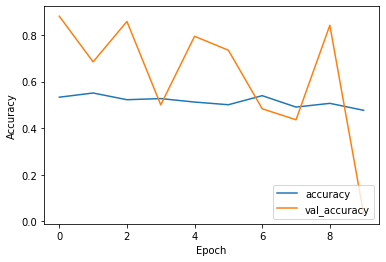

In [ ]:
model1()